# Credit Card Fraud Detection

In today's rapidly evolving digital landscape, credit card fraud threatens consumers and financial institutions. Our project employs advanced data-driven models to distinguish between fraudulent and legitimate transactions, bolstering customer security, curbing financial losses, and maintaining trust in the payment system.

##  Importing Data & Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
credit_card_data = pd.read_csv('creditcard.csv')

## Data Understanding

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


To display all rows of a dataset

In [4]:
pd.options.display.max_columns = None

In [5]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
ccd = credit_card_data

In [8]:
ccd.shape

(284807, 31)

In [9]:
print("Number of Rows",ccd.shape[0])
print("Number of Columns",ccd.shape[1])

Number of Rows 284807
Number of Columns 31


In [10]:
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No object datatype so we don't need any conversions

In [11]:
ccd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null vales that's great

In [12]:
ccd.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
ccd[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [14]:
ccd.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


As the 'Time' and 'Amount' columns in the dataset differ in scale from the other features, we are applying standard scaling using scikit-learn's StandardScaler to ensure uniform scaling and improve model accuracy.

## Data Preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [16]:
ccd['Amount'] = sc.fit_transform(ccd['Amount'].values.reshape(-1,1))
ccd['Time'] = sc.fit_transform(ccd['Time'].values.reshape(-1,1))

In [17]:
ccd.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0


I am omitting the 'Time' feature from our model since it is an external, non-contributory feature for our current objectives.

In [18]:
ccd = ccd.drop(['Time'],axis = 1)

In [19]:
ccd.shape

(284807, 30)

In [20]:
ccd.duplicated().any() 

True

It means that there are duplicate values in our dataset

In [21]:
ccd = ccd.drop_duplicates()

In [22]:
ccd.shape

(275663, 30)

**Before:** The dataset had a shape of (284807, 30).

**After removing duplicates:** The shape is now (275663, 30).

This indicates that 9144 values were originally duplicate transactions, As a result of removing duplicates and scaling,<br> our dataset is now free of duplicates and missing values, and it is ready for further analysis and modeling.

## Exploratory Data Analysis

**Distribution of Fraudulent and Legitimate Classes**

In [23]:
ccd['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

Here 1 depicts fraudulent cases and 0 depicts legitimate cases

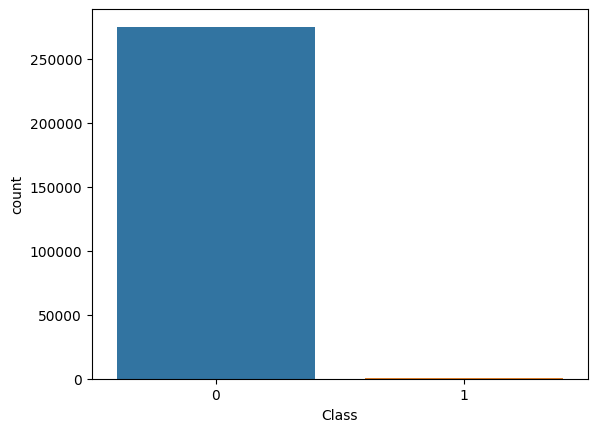

In [24]:
sns.countplot(x='Class', data=ccd, order=[0, 1])
plt.show()

We observe that there is a significant class imbalance in the dataset, where one class is represented by a large number of instances, while the other is represented by significantly fewer instances.

In [25]:
legitimate_cases = ccd[ccd['Class'] == 0]
legitimate_cases

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [26]:
legitimate_cases.shape

(275190, 30)

In [27]:
fraudulent_cases = ccd[ccd['Class'] == 1]
fraudulent_cases

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [28]:
fraudulent_cases.shape

(473, 30)

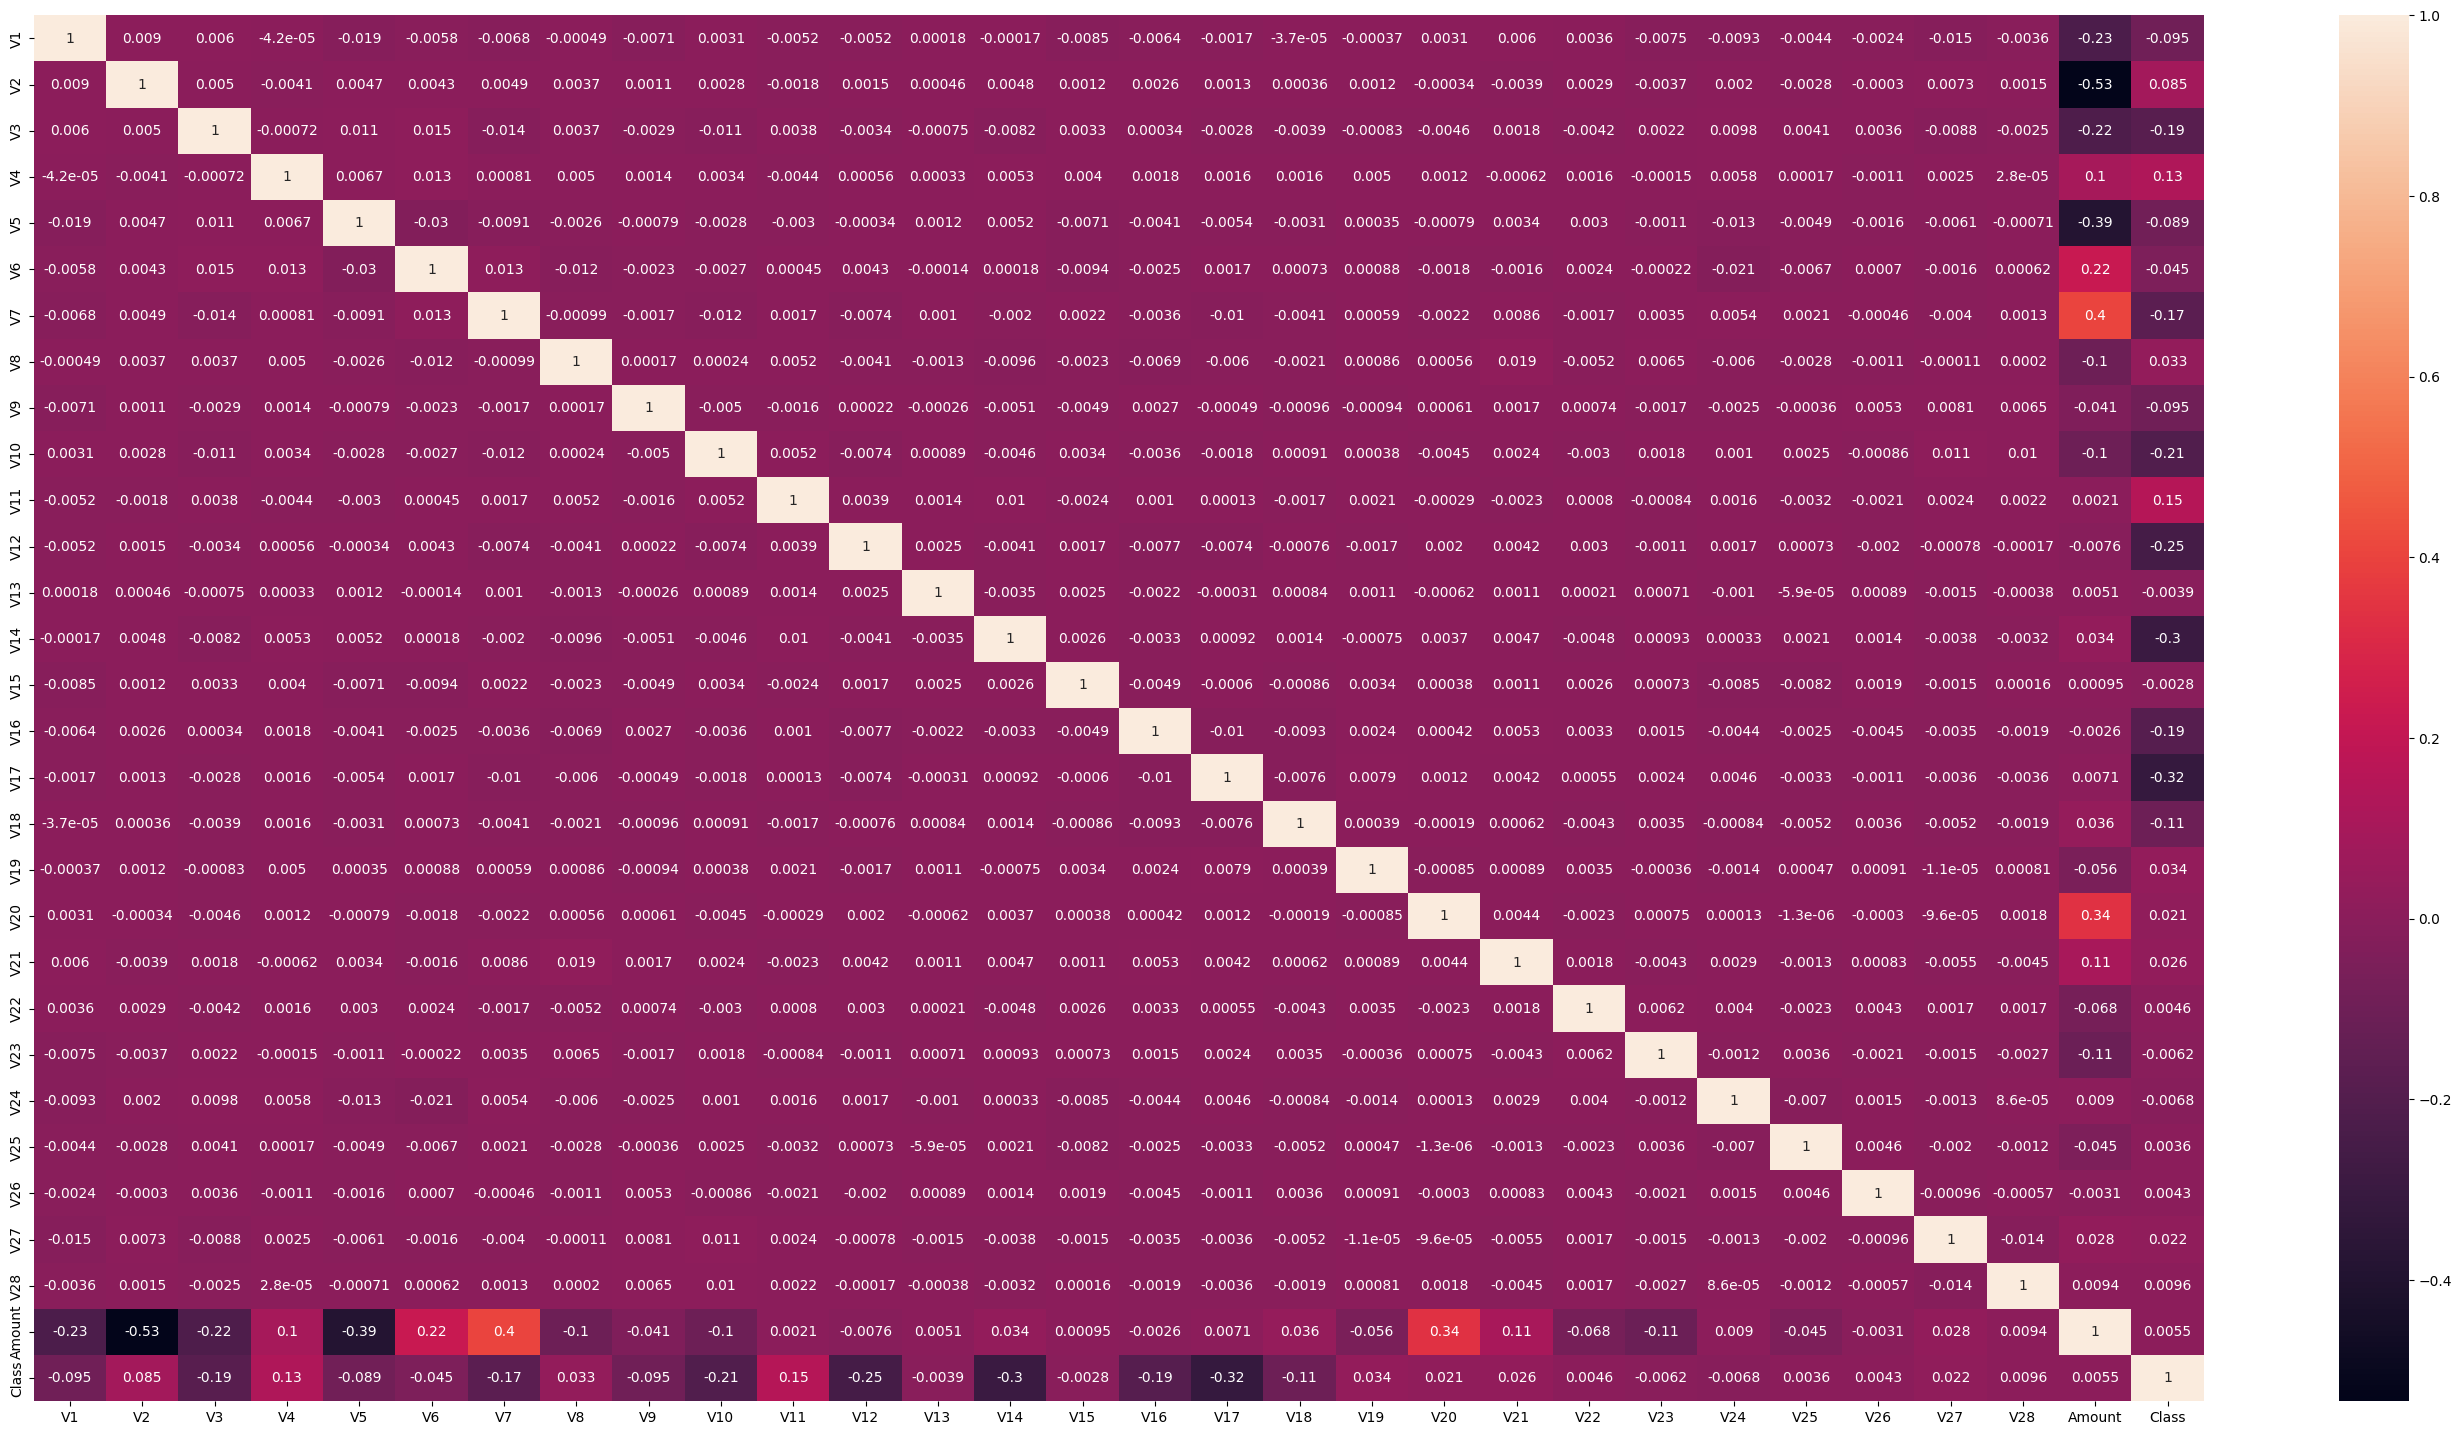

In [29]:
plt.figure(figsize = (35,18))
sns.heatmap(ccd.corr(), annot = True)
plt.show()

In [30]:
ccd.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000
mean,-0.037460,-0.002430,0.025520,-0.004359,-0.010660,-0.014206,0.008586,-0.005698,-0.012363,0.003114,-0.007174,-0.005347,0.000539,0.000681,-0.010315,-0.004319,0.000479,0.003874,0.000511,0.003407,0.002579,0.005827,-0.001941,-0.006868,-0.004812,-0.000240,0.001921,0.000904,0.008911,0.001716
std,1.952522,1.667260,1.507538,1.424323,1.378117,1.313213,1.240348,1.191596,1.100108,1.087025,1.020571,0.998661,0.999660,0.952571,0.917772,0.880320,0.844821,0.841638,0.820520,0.779950,0.733089,0.726378,0.631451,0.605550,0.524175,0.484139,0.401271,0.332649,1.012371,0.041388
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-0.353229,0.000000
25%,-0.941105,-0.614040,-0.843168,-0.862847,-0.700192,-0.765861,-0.552047,-0.209618,-0.659904,-0.538968,-0.772693,-0.413717,-0.654360,-0.425932,-0.596079,-0.477642,-0.482600,-0.498396,-0.464409,-0.212027,-0.225021,-0.532173,-0.165440,-0.361062,-0.323597,-0.328290,-0.071729,-0.052654,-0.328041,0.000000
50%,-0.059659,0.070249,0.200736,-0.035098,-0.060556,-0.270931,0.044848,0.022980,-0.064724,-0.091752,-0.039469,0.133349,-0.011557,0.049552,0.036145,0.061670,-0.063489,0.001392,0.001119,-0.058053,-0.025637,0.013397,-0.013655,0.037569,0.009909,-0.056667,0.002615,0.011788,-0.258315,0.000000
75%,1.294471,0.819067,1.048461,0.753943,0.604521,0.387704,0.583885,0.322319,0.593098,0.470702,0.734969,0.614670,0.668570,0.492169,0.638997,0.524709,0.401407,0.507708,0.465782,0.139803,0.189118,0.534272,0.145482,0.432931,0.347151,0.244196,0.094730,0.081355,-0.033742,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,102.362243,1.000000


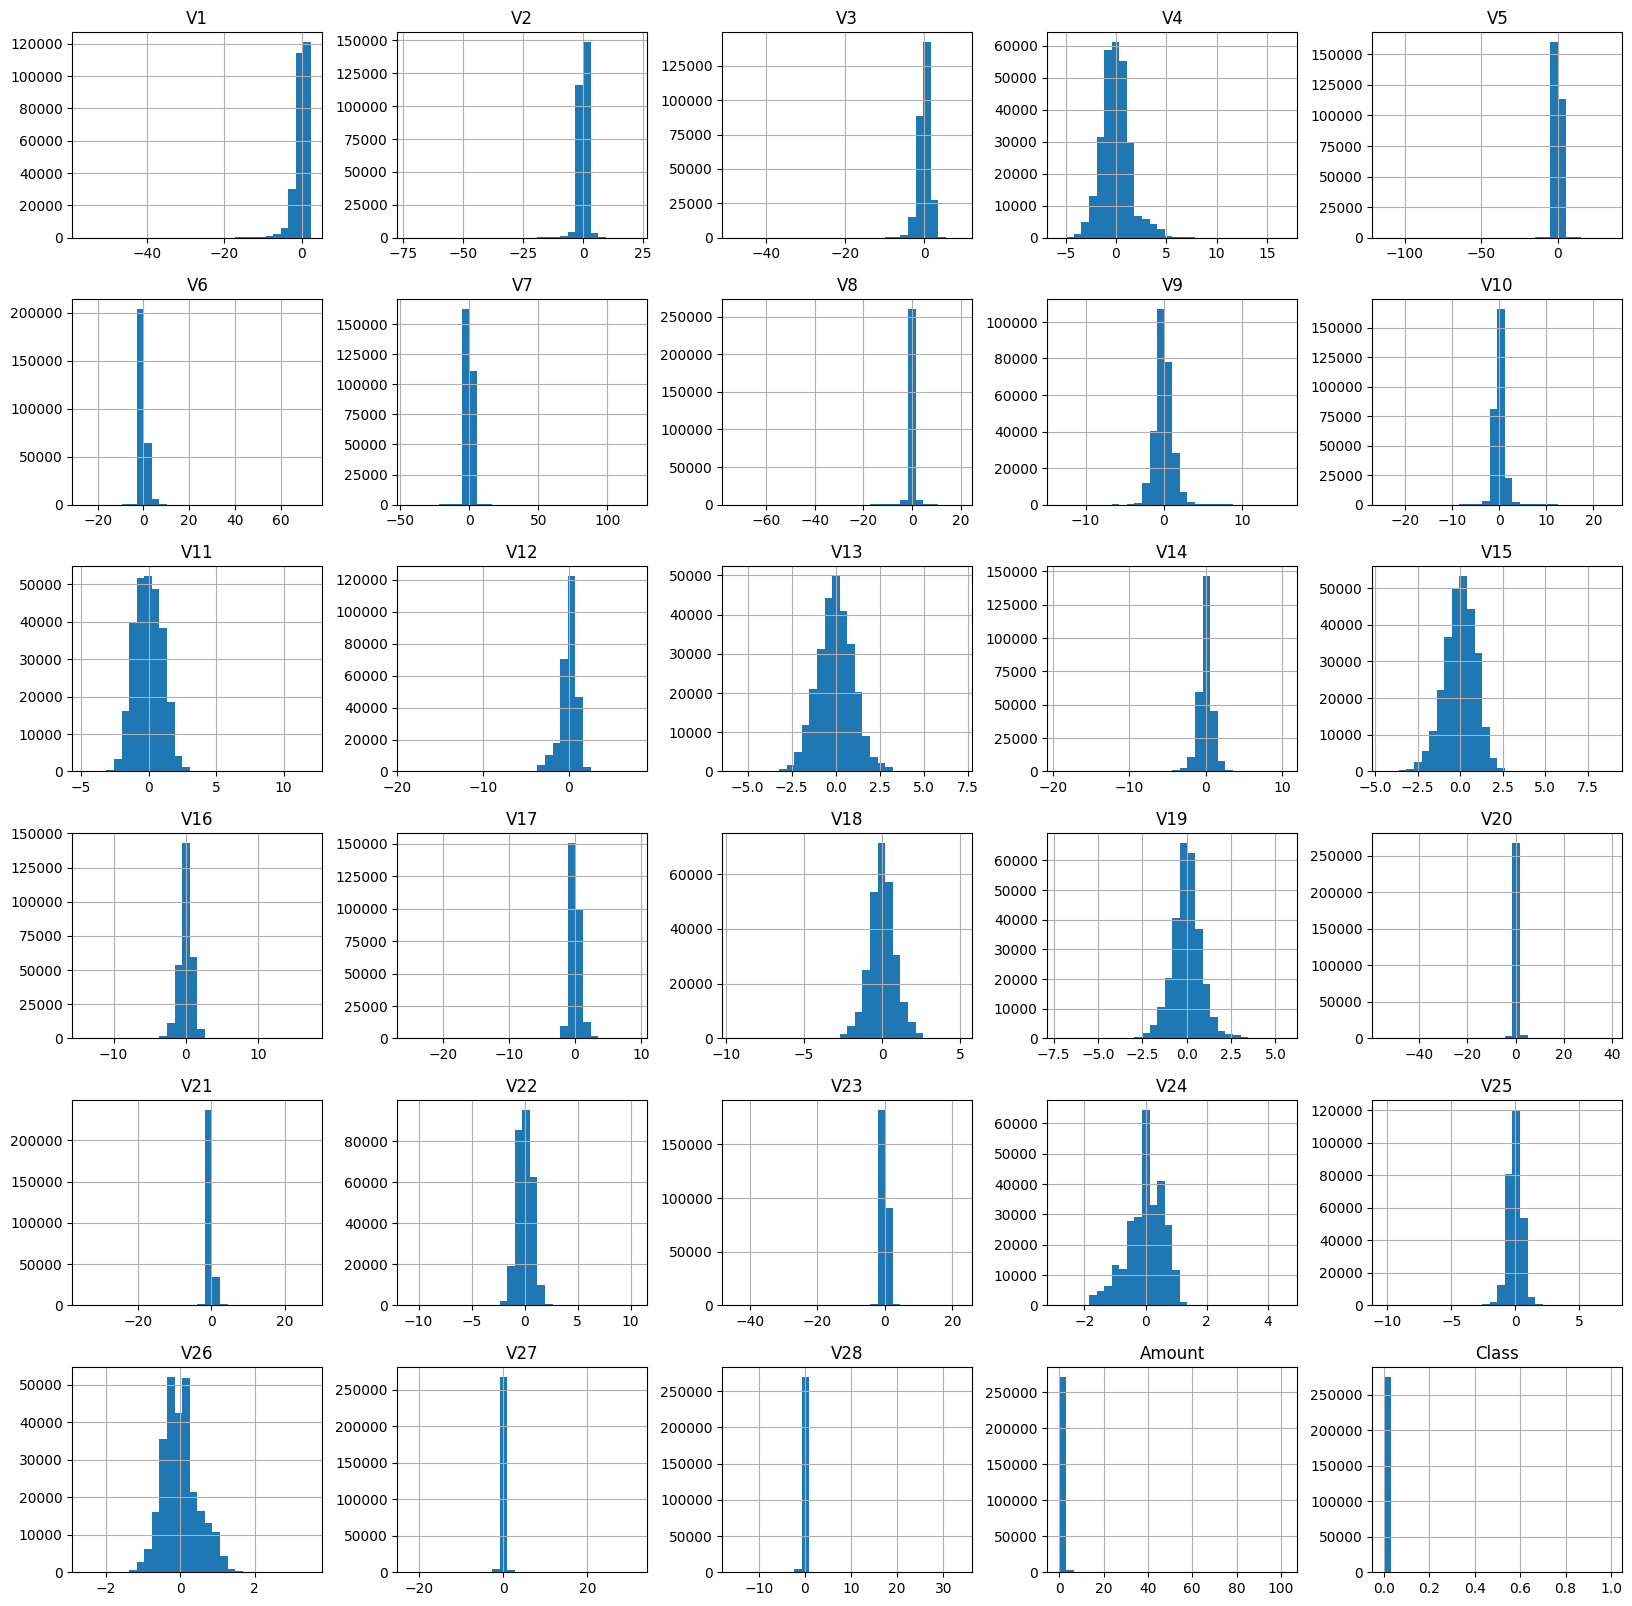

In [31]:
ccd.hist(bins = 30, figsize = (20,20))
plt.show()

**We are first assessing model performance with the imbalanced dataset and will proceed to refine it using balanced data.**

# Model Building

## For Imbalanced Data

In [32]:
X = ccd.drop("Class",axis = 1)
Y = ccd['Class']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 25)

**Logistic Regression**

In [34]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [35]:
Y_pred = log.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
print("Accuracy Score :",accuracy_score(Y_test,Y_pred))
print("Precision Score :",precision_score(Y_test,Y_pred))
print("Recall Score :",recall_score(Y_test,Y_pred))
print("F1 Score :",f1_score(Y_test,Y_pred))

Accuracy Score : 0.9990931021348376
Precision Score : 0.7714285714285715
Recall Score : 0.6136363636363636
F1 Score : 0.6835443037974683


We observe that there is  high accuracy score in contrast to the lower precision, recall, and F1 score indicates an imbalance in the dataset, highlighting the need for data balancing techniques.

## Balancing the Data using 

**i) Undersampling technique.** Undersampling is a method used to reduce the number of instances in the majority class to align with the number of instances in the minority class, thereby achieving a balanced dataset.


In [38]:
normal = ccd[ccd['Class']==0]
fraud = ccd[ccd['Class']==1]

In [39]:
print("Normal Cases", normal.shape)
print("Fraud Cases", fraud.shape)

Normal Cases (275190, 30)
Fraud Cases (473, 30)


we observe an abundance of normal transactions (275190) and a scarcity of fraud cases (473). <br>To rectify this imbalance, we randomly select 473 cases from the normal transactions to achieve data balance.

In [40]:
normal_sample = normal.sample(n = 473)

In [41]:
normal_sample.shape

(473, 30)

In [42]:
new_data = pd.concat([normal_sample,fraud],ignore_index = True)

In [43]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

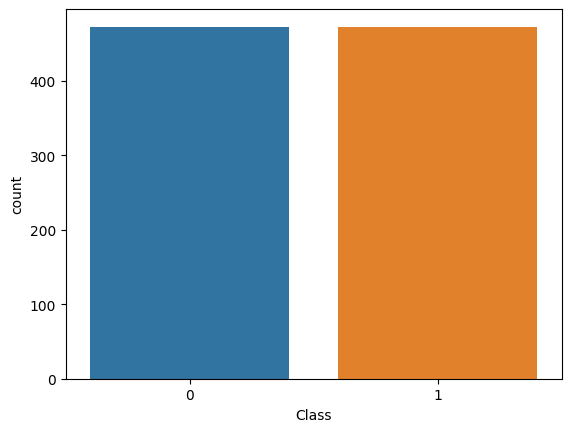

In [44]:
sns.countplot(x='Class', data = new_data, order=[0, 1])
plt.show()

Now, we have an equal number of samples for both fraudulent and normal transactions using **Under Sampling**

Splitting the data

In [45]:
X = new_data.drop('Class',axis = 1)
Y = new_data['Class']

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 25)

**Logistic Regression**

In [47]:
model1 = LogisticRegression()
model1.fit(X_train,Y_train)

LogisticRegression()

In [48]:
Y_pred1 = model1.predict(X_test)

In [49]:
print("Logistic Regression - Under-Sampling Metrics")
print("--------------------------------------------")
print("Accuracy Score:", round(accuracy_score(Y_test, Y_pred1), 2))
print("Precision Score:", round(precision_score(Y_test, Y_pred1), 2))
print("Recall Score:", round(recall_score(Y_test, Y_pred1), 2))
print("F1 Score:", round(f1_score(Y_test, Y_pred1), 2))

Logistic Regression - Under-Sampling Metrics
--------------------------------------------
Accuracy Score: 0.93
Precision Score: 0.95
Recall Score: 0.92
F1 Score: 0.93


**Decision Tree Classifier**

In [50]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [51]:
Y_pred2 = model2.predict(X_test)

In [52]:
print("Decision Tree - Under-Sampling Metrics")
print("--------------------------------------")
print("Accuracy Score:", round(accuracy_score(Y_test, Y_pred2), 2))
print("Precision Score:", round(precision_score(Y_test, Y_pred2), 2))
print("Recall Score:", round(recall_score(Y_test, Y_pred2), 2))
print("F1 Score:", round(f1_score(Y_test, Y_pred2), 2))

Decision Tree - Under-Sampling Metrics
--------------------------------------
Accuracy Score: 0.89
Precision Score: 0.9
Recall Score: 0.89
F1 Score: 0.89


**Random  Forest Classifier**

In [53]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train,Y_train)

RandomForestClassifier()

In [54]:
Y_pred3 = model3.predict(X_test)

In [55]:
print("Random Forest - Under-Sampling Metrics")
print("--------------------------------------")
print("Accuracy Score:", round(accuracy_score(Y_test, Y_pred3), 2))
print("Precision Score:", round(precision_score(Y_test, Y_pred3), 2))
print("Recall Score:", round(recall_score(Y_test, Y_pred3), 2))
print("F1 Score:", round(f1_score(Y_test, Y_pred3), 2))

Random Forest - Under-Sampling Metrics
--------------------------------------
Accuracy Score: 0.94
Precision Score: 0.97
Recall Score: 0.91
F1 Score: 0.94


In [56]:
final_data = pd.DataFrame({"Models":['LR','DT','RF'],
              "Accuracy":[accuracy_score(Y_test,Y_pred1)*100,
                          accuracy_score(Y_test,Y_pred2)*100,
                          accuracy_score(Y_test,Y_pred3)*100]})
final_data

,Models,Accuracy
0,LR,93.157895
1,DT,88.947368
2,RF,93.684211


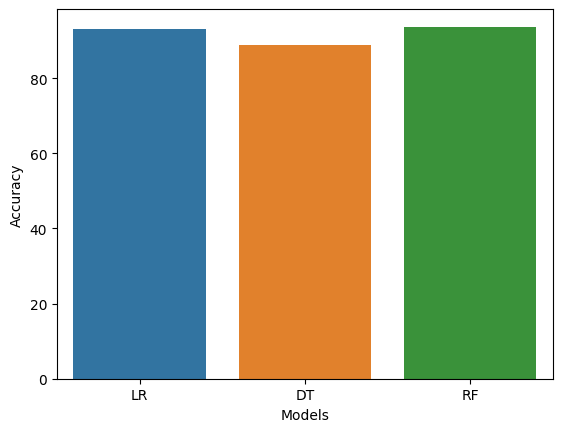

In [57]:
sns.barplot(x='Models', y='Accuracy', data=final_data)
plt.show()

We observe that Logistic Regression achieves notably higher accuracy in the under-sampling scenario, surpassing the accuracy of other models.

**ii) Over Sampling technique**

**Disadvantage of Under-Sampling:** It can lead to loss of valuable information because it discards a substantial portion of the majority class data.

**Overcoming Under-Sampling:** Use over-sampling techniques like Synthetic Minority Over-sampling Technique (SMOTE)  to balance the dataset by generating synthetic examples for the minority class.

In [58]:
X = ccd.drop('Class',axis = 1)
Y = ccd['Class']

In [59]:
X.shape

(275663, 29)

In [60]:
Y.shape

(275663,)

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
X_resample, Y_resample = SMOTE().fit_resample(X,Y)

In [63]:
X_resample.shape

(550380, 29)

In [64]:
Y_resample.shape

(550380,)

In [65]:
Y_resample.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

Now, we have an equal number of samples for both fraudulent and normal transactions using **Over Sampling** with SMOTE

Splitting the data

In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(X_resample, Y_resample, test_size = 0.2, random_state = 25)

**Logistic Regression**

In [67]:
model1 = LogisticRegression()
model1.fit(X_train,Y_train)

LogisticRegression()

In [68]:
Y_pred1 = model1.predict(X_test)

In [69]:
print("Logistic Regression - Under-Sampling Metrics")
print("--------------------------------------------")
print("Accuracy Score:", round(accuracy_score(Y_test, Y_pred1), 2))
print("Precision Score:", round(precision_score(Y_test, Y_pred1), 2))
print("Recall Score:", round(recall_score(Y_test, Y_pred1), 2))
print("F1 Score:", round(f1_score(Y_test, Y_pred1), 2))

Logistic Regression - Under-Sampling Metrics
--------------------------------------------
Accuracy Score: 0.94
Precision Score: 0.97
Recall Score: 0.91
F1 Score: 0.94


**Decision Tree Classifier**

In [70]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [71]:
Y_pred2 = model2.predict(X_test)

In [72]:
print("Decision Tree - Under-Sampling Metrics")
print("--------------------------------------")
print("Accuracy Score:", round(accuracy_score(Y_test, Y_pred2), 2))
print("Precision Score:", round(precision_score(Y_test, Y_pred2), 2))
print("Recall Score:", round(recall_score(Y_test, Y_pred2), 2))
print("F1 Score:", round(f1_score(Y_test, Y_pred2), 2))

Decision Tree - Under-Sampling Metrics
--------------------------------------
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


**Random Forest Classifier**

In [73]:
model3 = RandomForestClassifier()
model3.fit(X_train,Y_train)

RandomForestClassifier()

In [74]:
Y_pred3 = model3.predict(X_test)

In [75]:
print("Random Forest - Under-Sampling Metrics")
print("--------------------------------------")
print("Accuracy Score:", round(accuracy_score(Y_test, Y_pred3), 2))
print("Precision Score:", round(precision_score(Y_test, Y_pred3), 2))
print("Recall Score:", round(recall_score(Y_test, Y_pred3), 2))
print("F1 Score:", round(f1_score(Y_test, Y_pred3), 2))

Random Forest - Under-Sampling Metrics
--------------------------------------
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


In [76]:
final_data = pd.DataFrame({"Models":['LR','DT','RF'],
              "Accuracy":[accuracy_score(Y_test,Y_pred1)*100,
                          accuracy_score(Y_test,Y_pred2)*100,
                          accuracy_score(Y_test,Y_pred3)*100]})
final_data

,Models,Accuracy
0,LR,94.482903
1,DT,99.800138
2,RF,99.987282


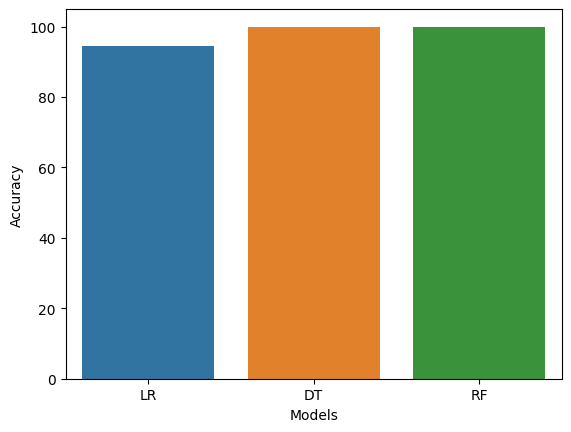

In [77]:
sns.barplot(x='Models', y='Accuracy', data=final_data)
plt.show()

We observe that Random Forest achieves notably higher accuracy (99 %) in the Over-Sampling scenario, surpassing the accuracy of other models.

For the **imbalanced data**, **Logistic Regression (93 %)** exhibited strong performance,<br> while for **balanced data**, **Random Forest (99 %)** achieved high accuracy. <br>Now, let's proceed to train the model with the entire dataset using Random Forest Classifier.

In [78]:
model = RandomForestClassifier()
model.fit(X_resample,Y_resample)

RandomForestClassifier()

# Model Saving

In [79]:
import joblib

In [80]:
joblib.dump(model,"Credit_Card_Model")

['Credit_Card_Model']

In [81]:
model = joblib.load("Credit_Card_Model")

In [93]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1]]) 

In [94]:
if pred == 0:
    print("Legitimate Transaction")
else:
    print("Fraudulent Transaction")

Legitimate Transaction


In [ ]:
THANKYOU